# DATA LOADING, PREPROCESSING, OUTLIER REMOVAL, ETC..

In [10]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load dataset
file_path = "vehicle.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
missing_cols = df.columns[df.isnull().any()]
def determine_filling_strategy(df, col):
    if df[col].dtype == 'object':  # Categorical column
        return "Mode"
    
    # Check skewness to decide between mean and median
    skewness = df[col].skew()
    
    if -0.5 <= skewness <= 0.5:
        return "Mean"  # Normally distributed
    else:
        return "Median"  # Skewed distribution

# Print the recommended strategy for each column
for col in missing_cols:
    strategy = determine_filling_strategy(df, col)
    print(f"Column: {col} | Recommended Filling Strategy: {strategy}")


Column: circularity | Recommended Filling Strategy: Mean
Column: distance_circularity | Recommended Filling Strategy: Mean
Column: radius_ratio | Recommended Filling Strategy: Mean
Column: pr.axis_aspect_ratio | Recommended Filling Strategy: Median
Column: scatter_ratio | Recommended Filling Strategy: Median
Column: elongatedness | Recommended Filling Strategy: Mean
Column: pr.axis_rectangularity | Recommended Filling Strategy: Median
Column: scaled_variance | Recommended Filling Strategy: Median
Column: scaled_variance.1 | Recommended Filling Strategy: Median
Column: scaled_radius_of_gyration | Recommended Filling Strategy: Mean
Column: scaled_radius_of_gyration.1 | Recommended Filling Strategy: Median
Column: skewness_about | Recommended Filling Strategy: Median
Column: skewness_about.1 | Recommended Filling Strategy: Median
Column: skewness_about.2 | Recommended Filling Strategy: Mean


In [9]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Missing Values Percentage per Column:\n", missing_percentage)

Missing Values Percentage per Column:
 compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [22]:
df= df.dropna()
print(df.shape)
df.describe()

(813, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [34]:
cleaned_file_path = "Cleaned_vehicle.csv"
df.to_csv(cleaned_file_path, index=False)


In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['class'], dtype='object')

In [35]:
# Count the number of samples in each class
class_counts = df["class"].value_counts()

# Display the counts
print(class_counts)


class
car    413
bus    205
van    195
Name: count, dtype: int64


In [38]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

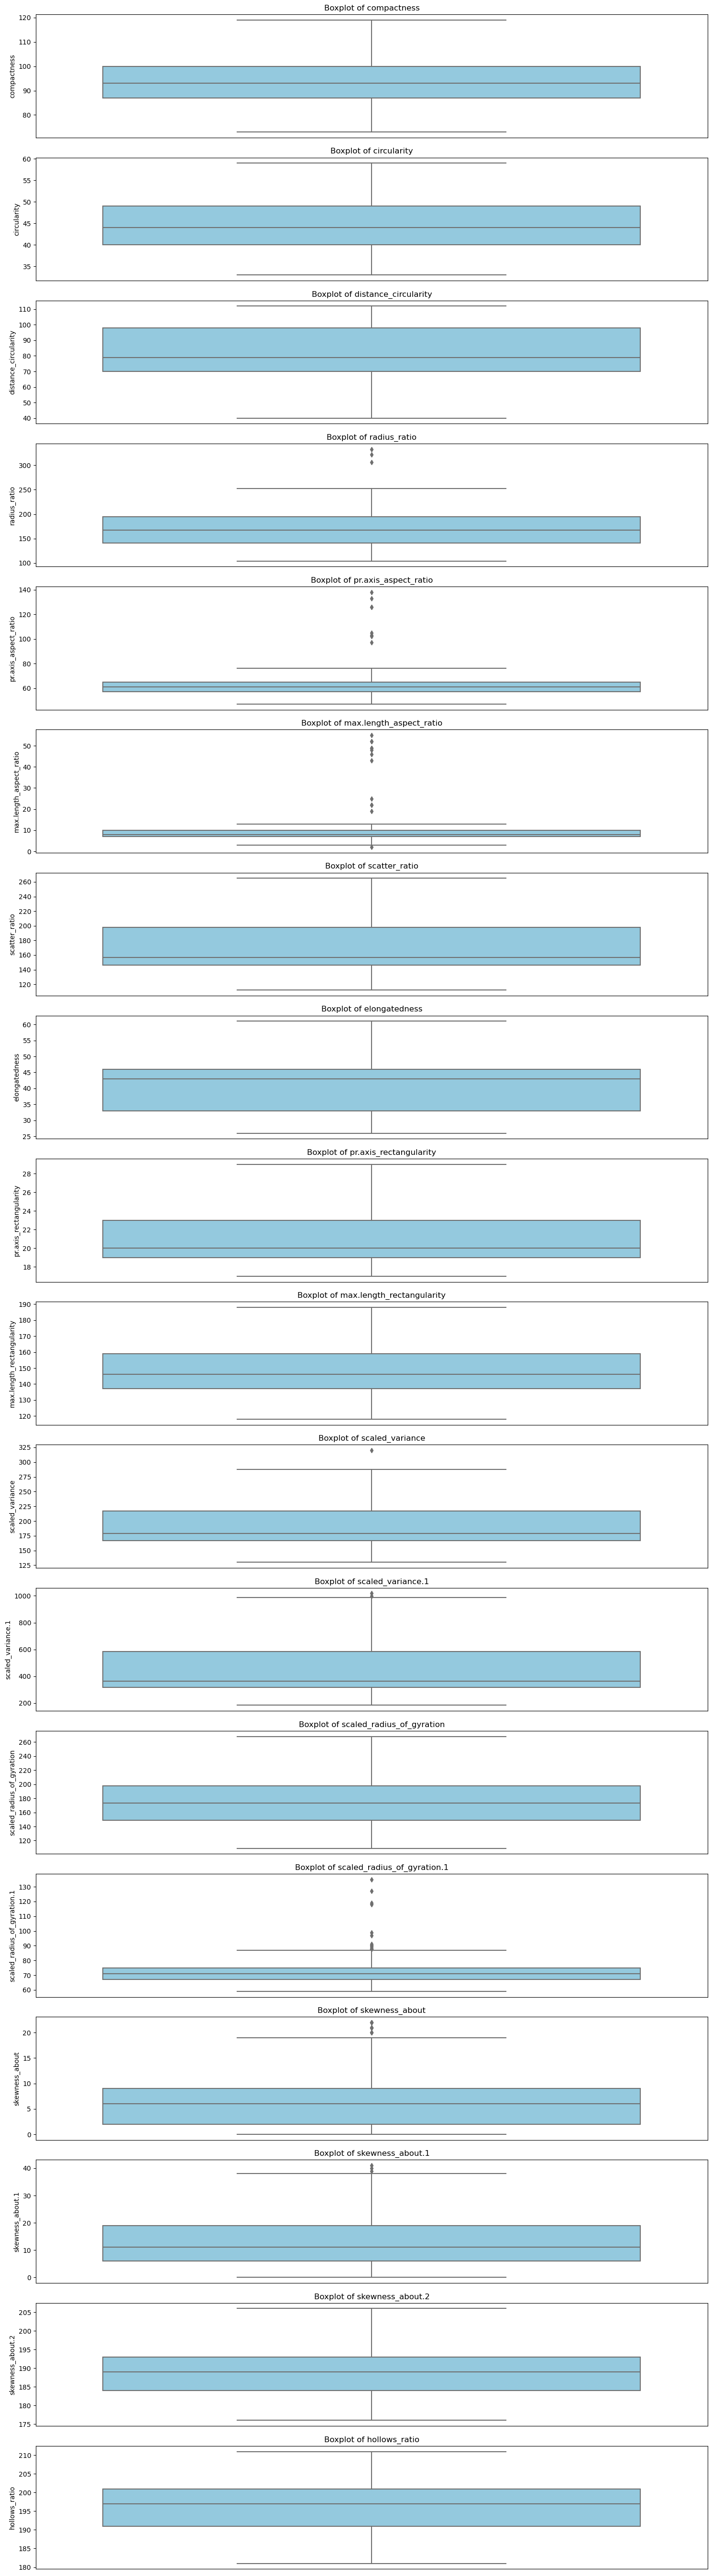

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Box Plot for Numerical Columns with Better Spacing
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_cols) * 3))  # Adjust height dynamically
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  # One column per row
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.xticks([])  # Remove x-ticks to reduce clutter

plt.tight_layout()
plt.show()


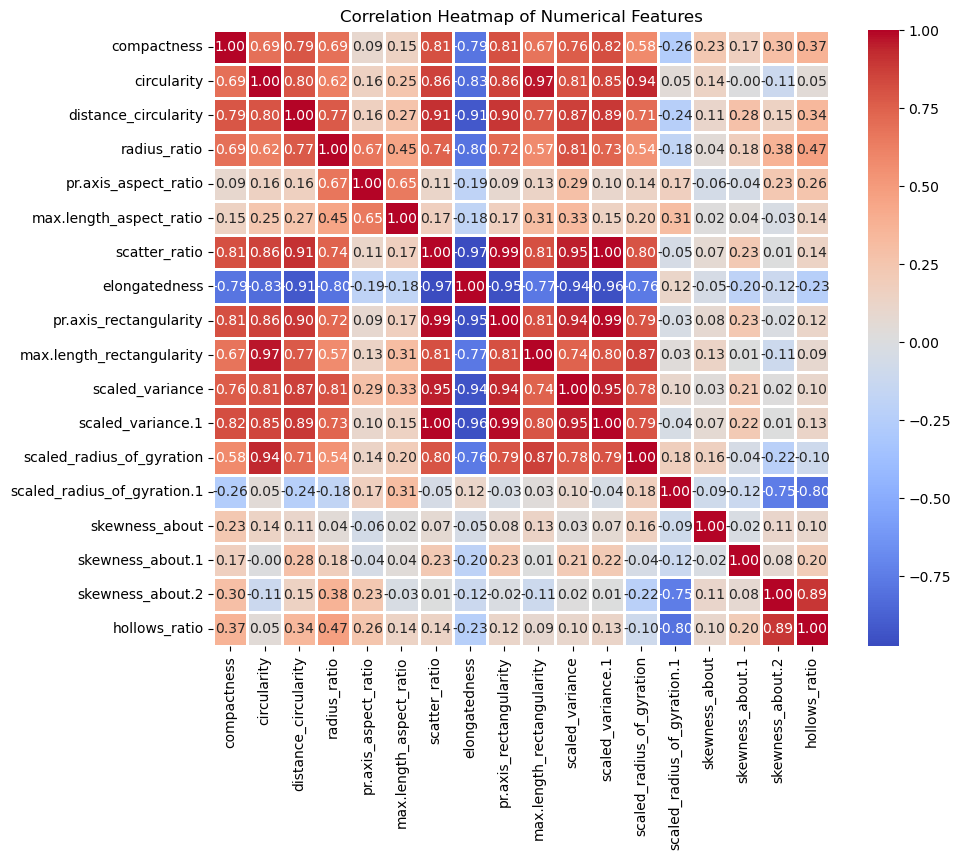

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [40]:
import numpy as np

# Columns to analyze
outlier_cols = ["pr.axis_aspect_ratio", "max.length_aspect_ratio", "scaled_radius_of_gyration"]

# Compute Q1, Q3, and IQR
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outlier_mask = (df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)
outlier_counts = outlier_mask.sum()
outlier_percentage = (outlier_counts / len(df)) * 100

# Print results
print("Outlier Percentage per Column:")
print(outlier_percentage)


Outlier Percentage per Column:
pr.axis_aspect_ratio         0.984010
max.length_aspect_ratio      1.599016
scaled_radius_of_gyration    0.000000
dtype: float64


In [41]:
import numpy as np

# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute Q1, Q3, and IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in each column
outlier_mask = (df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)
outlier_counts = outlier_mask.sum()

# Print results
print("Outlier Count per Column:")
print(outlier_counts)


Outlier Count per Column:
compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    3
pr.axis_aspect_ratio            8
max.length_aspect_ratio        13
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 1
scaled_variance.1               2
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
skewness_about                 12
skewness_about.1                3
skewness_about.2                0
hollows_ratio                   0
dtype: int64


pr.axis_aspect_ratio: Skewness = 3.833 → ❌ Highly Skewed
max.length_aspect_ratio: Skewness = 6.698 → ❌ Highly Skewed
scaled_radius_of_gyration.1: Skewness = 2.157 → ❌ Highly Skewed
skewness_about: Skewness = 0.783 → ⚠️ Moderately Skewed
radius_ratio: Skewness = 0.396 → ✅ Normal Distribution
skewness_about.1: Skewness = 0.671 → ⚠️ Moderately Skewed
scaled_variance: Skewness = 0.629 → ⚠️ Moderately Skewed
scaled_variance.1: Skewness = 0.823 → ⚠️ Moderately Skewed


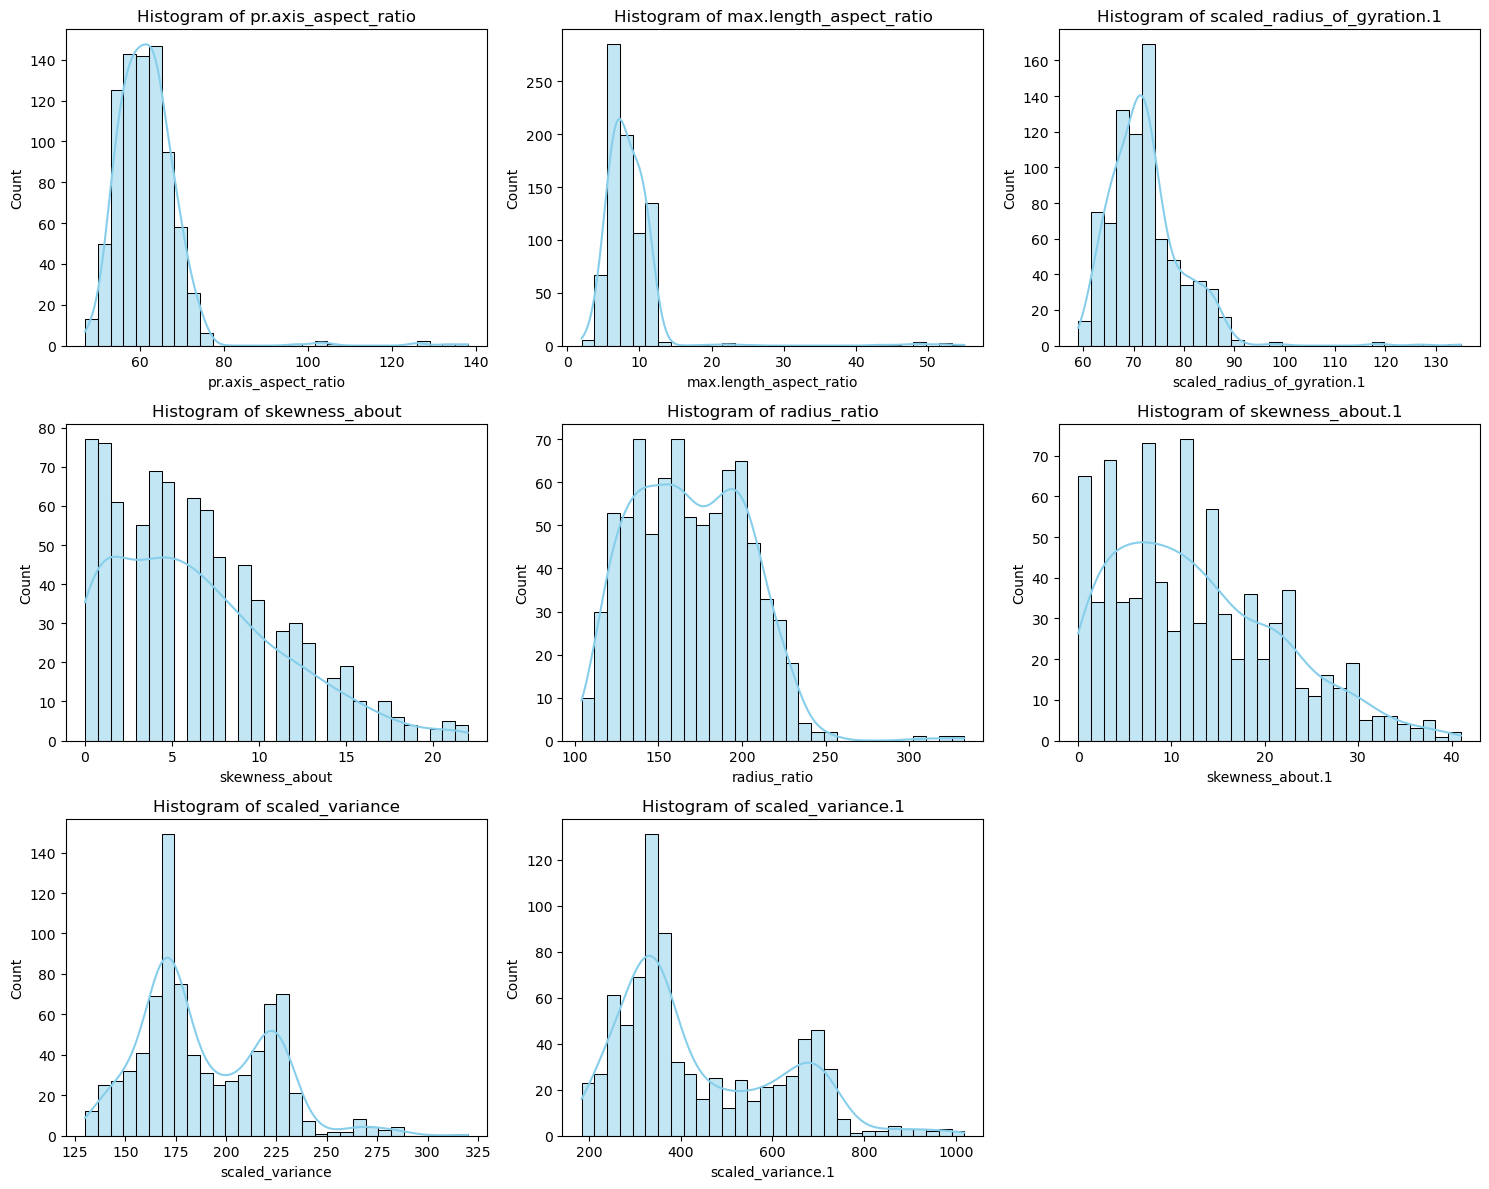

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of columns to check for skewness
outlier_cols = [
    "pr.axis_aspect_ratio", "max.length_aspect_ratio", "scaled_radius_of_gyration.1", 
    "skewness_about", "radius_ratio", "skewness_about.1", 
    "scaled_variance", "scaled_variance.1"
]

# Function to classify skewness level
def classify_skewness(skew_value):
    if abs(skew_value) < 0.5:
        return "✅ Normal Distribution"
    elif 0.5 <= abs(skew_value) < 1:
        return "⚠️ Moderately Skewed"
    else:
        return "❌ Highly Skewed"

# Plot histograms & check skewness
plt.figure(figsize=(15, 12))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram of {col}")
    
    skew_value = df[col].skew()
    print(f"{col}: Skewness = {skew_value:.3f} → {classify_skewness(skew_value)}")

plt.tight_layout()
plt.show()



✅ After Transformation:
pr.axis_aspect_ratio: Skewness = 0.161
max.length_aspect_ratio: Skewness = 0.187
scaled_radius_of_gyration.1: Skewness = 0.544
skewness_about: Skewness = -0.326
skewness_about.1: Skewness = -0.266
scaled_variance: Skewness = 0.442
scaled_variance.1: Skewness = 0.551


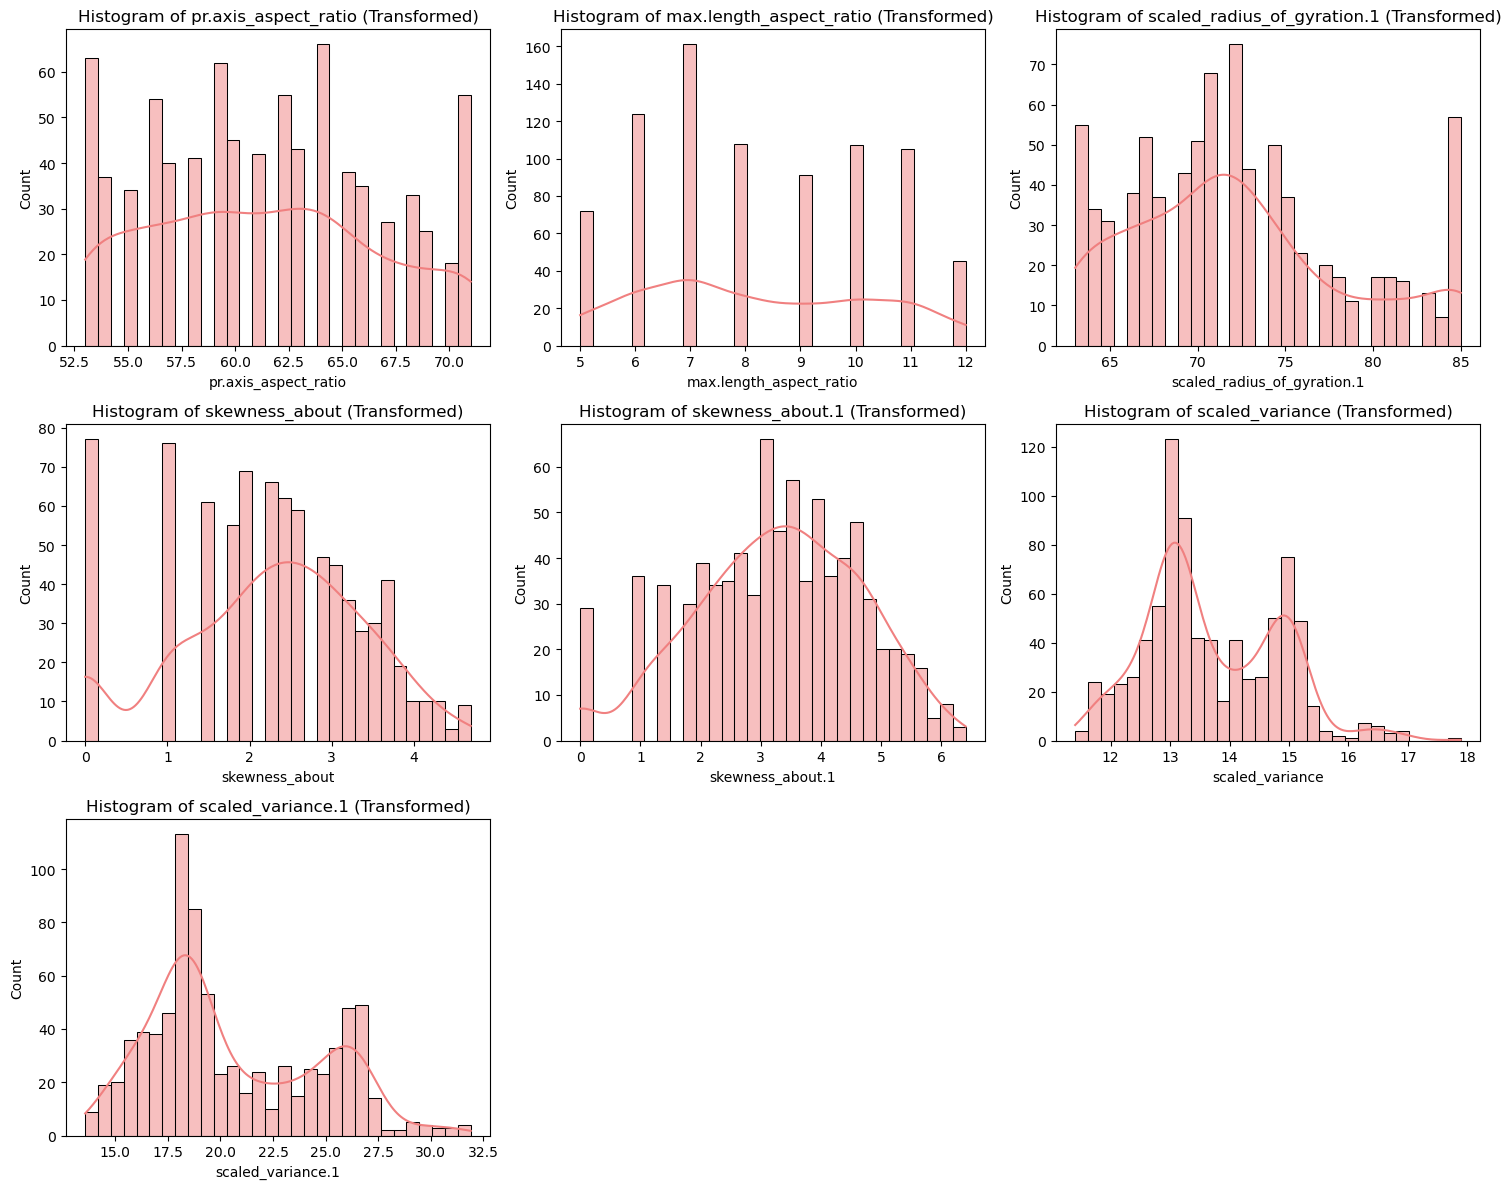

In [43]:
from scipy.stats.mstats import winsorize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Winsorization for highly skewed data
df["pr.axis_aspect_ratio"] = winsorize(df["pr.axis_aspect_ratio"], limits=[0.05, 0.05])
df["max.length_aspect_ratio"] = winsorize(df["max.length_aspect_ratio"], limits=[0.05, 0.05])
df["scaled_radius_of_gyration.1"] = winsorize(df["scaled_radius_of_gyration.1"], limits=[0.05, 0.05])

# Apply Square Root Transformation for moderately skewed data
df["skewness_about"] = np.sqrt(df["skewness_about"])
df["skewness_about.1"] = np.sqrt(df["skewness_about.1"])
df["scaled_variance"] = np.sqrt(df["scaled_variance"])
df["scaled_variance.1"] = np.sqrt(df["scaled_variance.1"])

# List of transformed columns
transformed_cols = [
    "pr.axis_aspect_ratio", "max.length_aspect_ratio", "scaled_radius_of_gyration.1",
    "skewness_about", "skewness_about.1", "scaled_variance", "scaled_variance.1"
]

# Recalculate and print skewness
print("\n✅ After Transformation:")
for col in transformed_cols:
    skew_value = df[col].skew()
    print(f"{col}: Skewness = {skew_value:.3f}")

# Plot histograms again
plt.figure(figsize=(15, 12))
for i, col in enumerate(transformed_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="lightcoral")
    plt.title(f"Histogram of {col} (Transformed)")

plt.tight_layout()
plt.show()

In [44]:
print("\n✅ Skewness After Transformation:")
for col in transformed_cols:
    skew_value = df[col].skew()
    
    if abs(skew_value) > 2:
        status = "❌ Highly Skewed"
    elif abs(skew_value) > 0.5:
        status = "⚠️ Moderately Skewed"
    else:
        status = "✅ Normal Distribution"
    
    print(f"{col}: Skewness = {skew_value:.3f} → {status}")


✅ Skewness After Transformation:
pr.axis_aspect_ratio: Skewness = 0.161 → ✅ Normal Distribution
max.length_aspect_ratio: Skewness = 0.187 → ✅ Normal Distribution
scaled_radius_of_gyration.1: Skewness = 0.544 → ⚠️ Moderately Skewed
skewness_about: Skewness = -0.326 → ✅ Normal Distribution
skewness_about.1: Skewness = -0.266 → ✅ Normal Distribution
scaled_variance: Skewness = 0.442 → ✅ Normal Distribution
scaled_variance.1: Skewness = 0.551 → ⚠️ Moderately Skewed


In [47]:
df.to_csv("Cleaned_vehicle.csv", index=False)
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,71.0,10,162.0,42.0,20.0,159,13.266499,19.467922,184.0,70.0,2.449490,4.000000,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,13.038405,18.165902,158.0,72.0,3.000000,3.741657,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,14.933185,25.199206,220.0,73.0,3.741657,3.000000,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,12.649111,17.578396,127.0,63.0,2.449490,3.162278,199.0,207,van
4,85,44.0,70.0,205.0,71.0,12,149.0,45.0,19.0,144,15.524175,18.027756,188.0,85.0,3.000000,3.316625,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,13.266499,19.000000,172.0,66.0,3.605551,1.000000,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,12.727922,16.763055,164.0,67.0,1.732051,1.732051,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,11.874342,14.933185,112.0,64.0,1.414214,3.741657,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,12.369317,16.309506,127.0,66.0,1.414214,3.162278,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,12.165525,14.966630,118.0,65.0,2.236068,5.099020,196.0,202,car


In [50]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()
corr_percentage = corr_matrix * 100
corr_percentage.round(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,100.00,68.99,79.00,68.81,20.18,48.81,81.40,-78.81,81.42,67.49,76.45,81.83,58.14,-27.59,18.95,15.73,29.62,37.28
circularity,68.99,100.00,79.77,62.40,22.03,55.46,85.81,-82.51,85.61,96.54,80.87,85.30,93.56,5.44,12.29,-0.42,-11.39,4.93
distance_circularity,79.00,79.77,100.00,77.14,26.10,65.21,90.90,-91.27,89.73,77.35,87.49,90.90,70.57,-26.46,7.46,25.20,14.53,34.32
radius_ratio,68.81,62.40,77.14,100.00,68.33,49.15,74.35,-79.58,71.62,57.05,81.49,75.75,54.46,-32.18,1.55,16.11,37.56,47.09
pr.axis_aspect_ratio,20.18,22.03,26.10,68.33,100.00,18.52,21.69,-31.62,18.29,17.63,28.70,23.68,18.49,-26.46,-4.47,-3.83,37.24,38.91
max.length_aspect_ratio,48.81,55.46,65.21,49.15,18.52,100.00,48.83,-49.36,48.83,64.49,45.59,47.67,41.07,-28.05,6.03,13.57,4.72,38.06
scatter_ratio,81.40,85.81,90.90,74.35,21.69,48.83,100.00,-97.34,99.20,80.82,95.21,99.91,79.57,-3.08,4.90,20.85,1.00,13.84
elongatedness,-78.81,-82.51,-91.27,-79.58,-31.62,-49.36,-97.34,100.00,-95.03,-77.11,-94.89,-97.86,-76.16,12.02,-2.82,-18.25,-11.76,-23.34
pr.axis_rectangularity,81.42,85.61,89.73,71.62,18.29,48.83,99.20,-95.03,100.00,81.20,93.53,98.93,79.29,-1.44,5.75,21.20,-1.74,11.72
max.length_rectangularity,67.49,96.54,77.35,57.05,17.63,64.49,80.82,-77.11,81.20,100.00,74.86,79.91,86.52,3.32,11.15,1.68,-10.80,8.68


# DATA VISUALIZATION

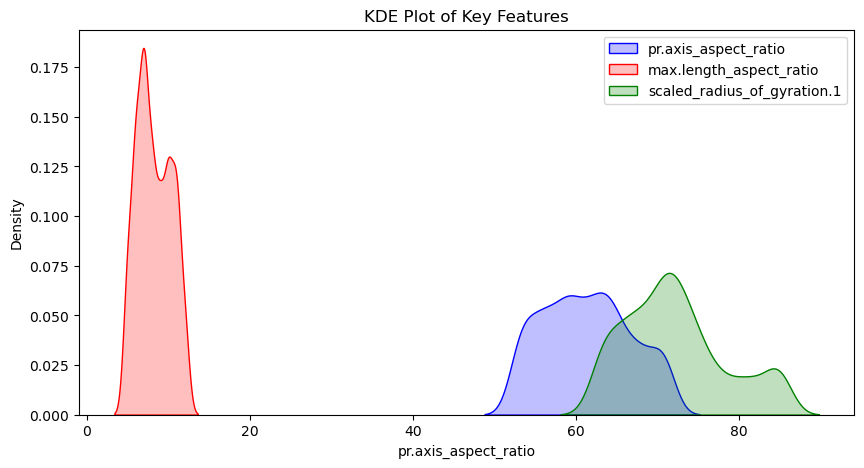

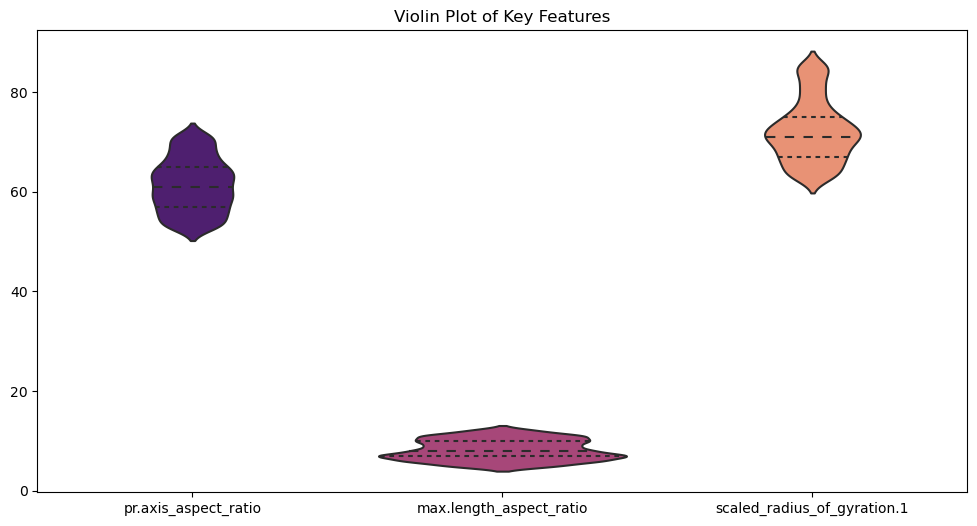

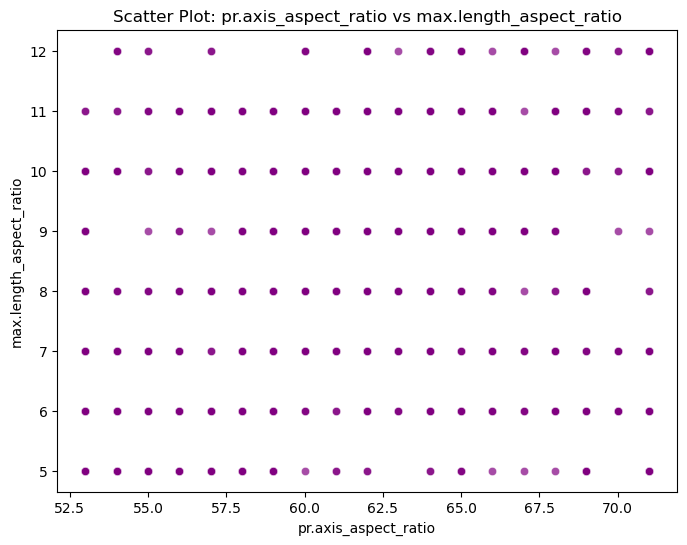

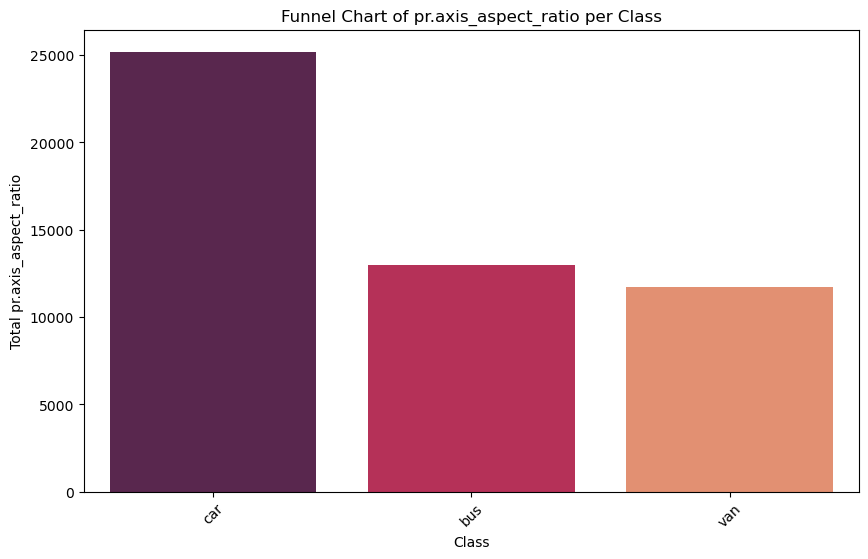

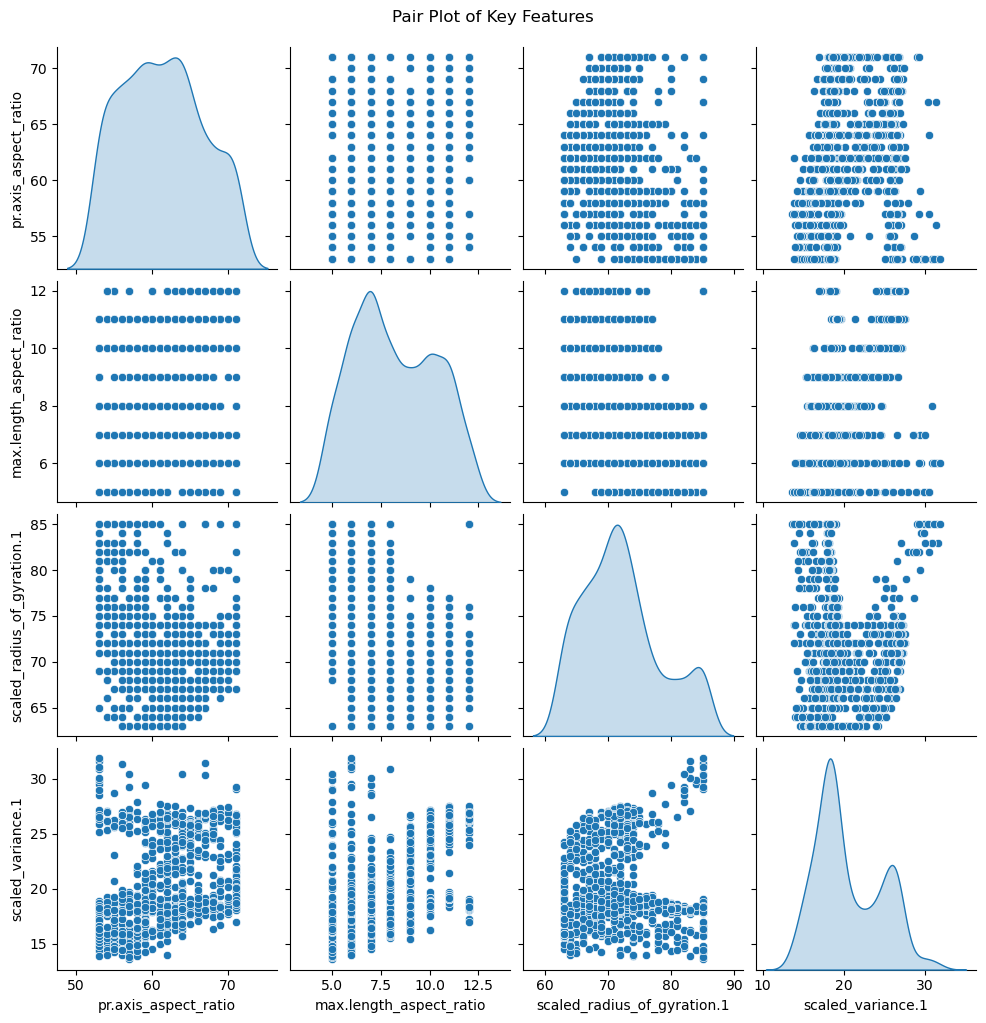

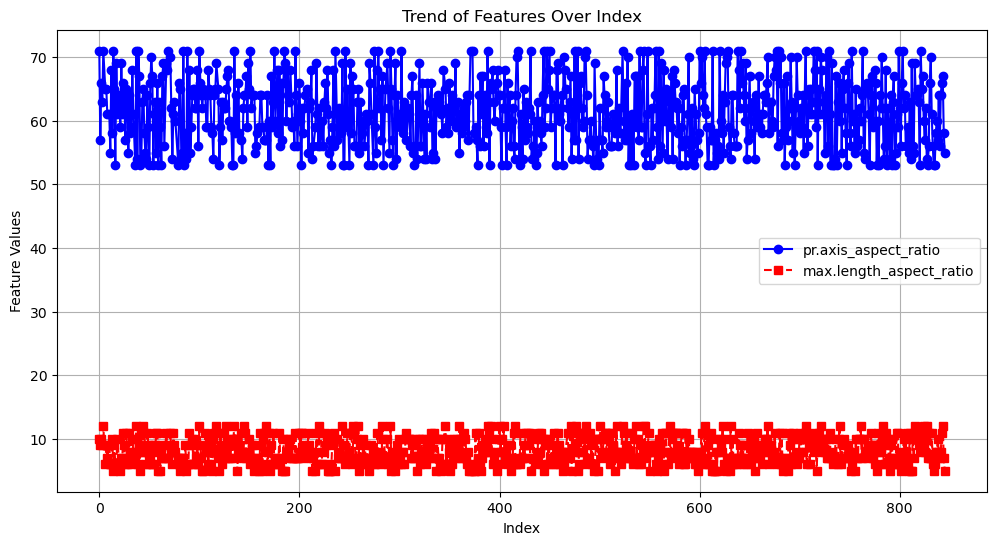

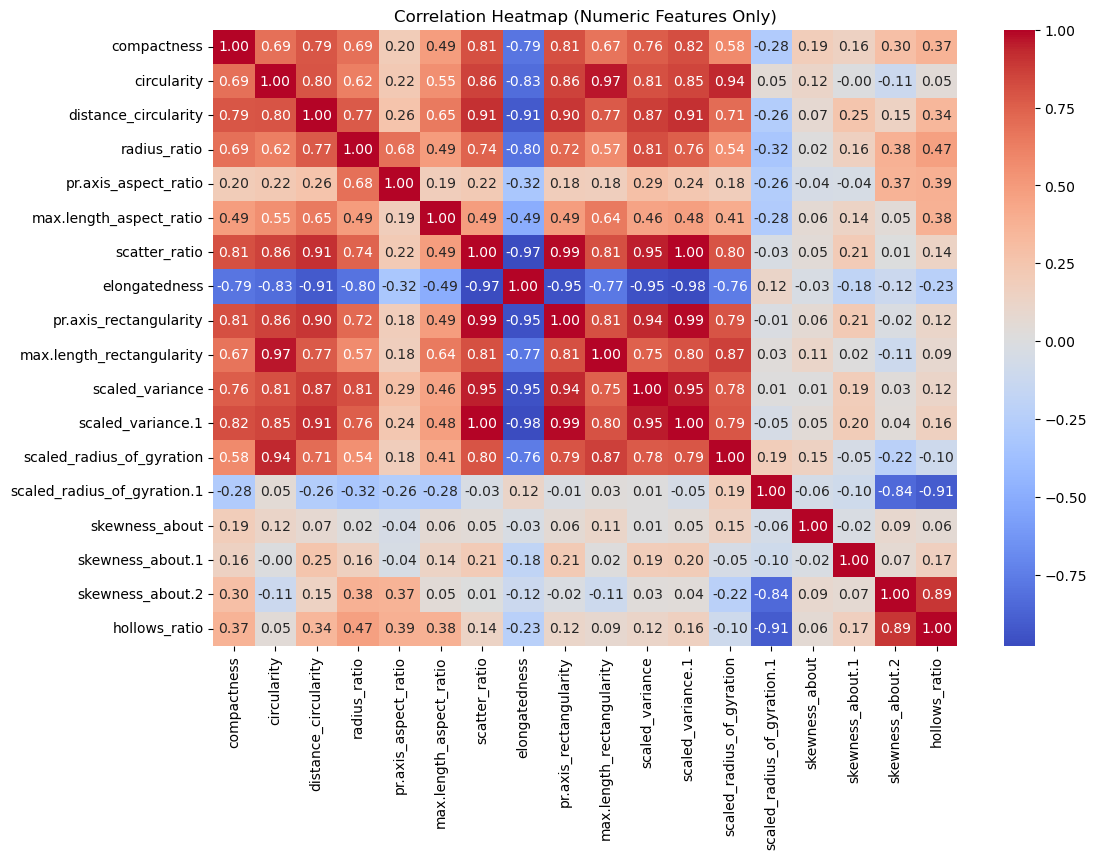

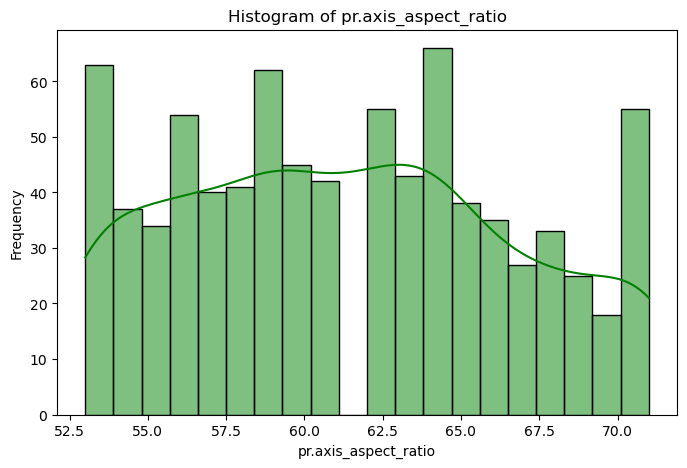

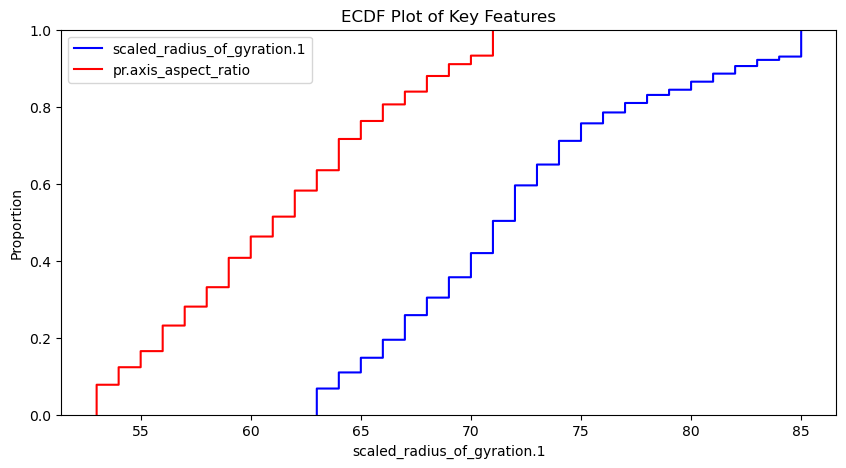

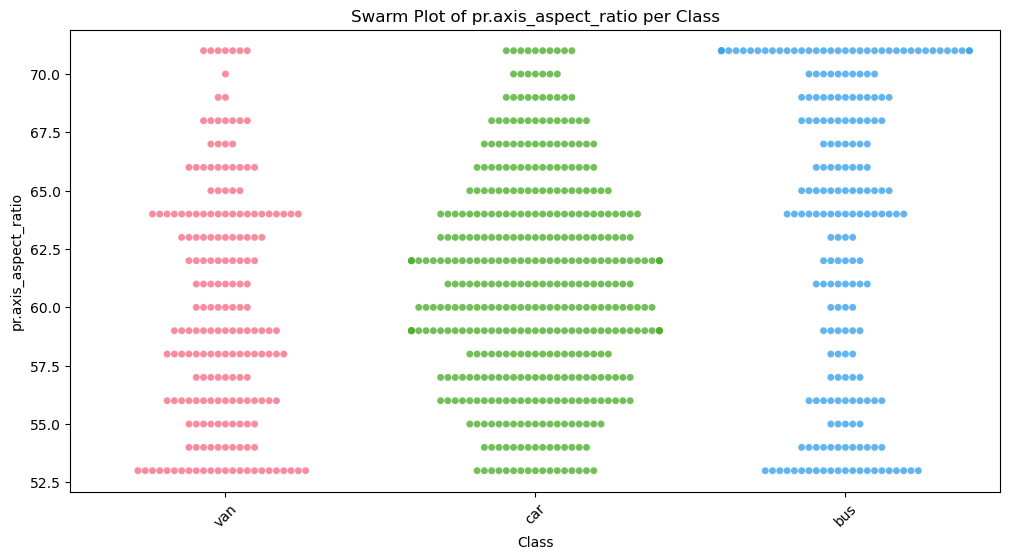

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. KDE Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df["pr.axis_aspect_ratio"], shade=True, color="blue", label="pr.axis_aspect_ratio")
sns.kdeplot(df["max.length_aspect_ratio"], shade=True, color="red", label="max.length_aspect_ratio")
sns.kdeplot(df["scaled_radius_of_gyration.1"], shade=True, color="green", label="scaled_radius_of_gyration.1")
plt.title("KDE Plot of Key Features")
plt.legend()
plt.show()

# 2. Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[["pr.axis_aspect_ratio", "max.length_aspect_ratio", "scaled_radius_of_gyration.1"]], palette="magma", inner="quartile")
plt.title("Violin Plot of Key Features")
plt.show()

# 3. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["pr.axis_aspect_ratio"], y=df["max.length_aspect_ratio"], color="purple", alpha=0.7)
plt.title("Scatter Plot: pr.axis_aspect_ratio vs max.length_aspect_ratio")
plt.xlabel("pr.axis_aspect_ratio")
plt.ylabel("max.length_aspect_ratio")
plt.show()

# 4. Funnel Chart (Sum of a Numerical Column per Class)
numerical_column = "pr.axis_aspect_ratio"
funnel_data = df.groupby("class")[numerical_column].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=funnel_data.index, y=funnel_data.values, palette="rocket")
plt.title("Funnel Chart of pr.axis_aspect_ratio per Class")
plt.xlabel("Class")
plt.ylabel(f"Total {numerical_column}")
plt.xticks(rotation=45)
plt.show()

# 5. Pair Plot (Feature Relationships)
sns.pairplot(df[["pr.axis_aspect_ratio", "max.length_aspect_ratio", "scaled_radius_of_gyration.1", "scaled_variance.1"]], diag_kind="kde")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

# 6. Trend Line (Feature Values Over Index)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["pr.axis_aspect_ratio"], marker="o", linestyle="-", color="blue", label="pr.axis_aspect_ratio")
plt.plot(df.index, df["max.length_aspect_ratio"], marker="s", linestyle="--", color="red", label="max.length_aspect_ratio")
plt.title("Trend of Features Over Index")
plt.xlabel("Index")
plt.ylabel("Feature Values")
plt.legend()
plt.grid()
plt.show()


# 8. Heatmap (Correlation Matrix)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  # This removes non-numeric columns like 'class'

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# 9. Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["pr.axis_aspect_ratio"], bins=20, kde=True, color="green")
plt.title("Histogram of pr.axis_aspect_ratio")
plt.xlabel("pr.axis_aspect_ratio")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.ecdfplot(df["scaled_radius_of_gyration.1"], color="blue", label="scaled_radius_of_gyration.1")
sns.ecdfplot(df["pr.axis_aspect_ratio"], color="red", label="pr.axis_aspect_ratio")
plt.title("ECDF Plot of Key Features")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.swarmplot(x=df["class"], y=df["pr.axis_aspect_ratio"], palette="husl", alpha=0.8)
plt.title("Swarm Plot of pr.axis_aspect_ratio per Class")
plt.xlabel("Class")
plt.ylabel("pr.axis_aspect_ratio")
plt.xticks(rotation=45)
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
# Initialize Label Encoder
le = LabelEncoder()
# Convert class column to numerical labels
df["class"] = le.fit_transform(df["class"])
# To see the mapping of original labels to numbers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class Label Mapping:", label_mapping)

Class Label Mapping: {'bus': 0, 'car': 1, 'van': 2}


In [63]:
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,71.0,10,162.0,42.0,20.0,159,13.266499,19.467922,184.0,70.0,2.449490,4.000000,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,13.038405,18.165902,158.0,72.0,3.000000,3.741657,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,14.933185,25.199206,220.0,73.0,3.741657,3.000000,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,12.649111,17.578396,127.0,63.0,2.449490,3.162278,199.0,207,2
4,85,44.0,70.0,205.0,71.0,12,149.0,45.0,19.0,144,15.524175,18.027756,188.0,85.0,3.000000,3.316625,180.0,183,0
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,13.266499,19.000000,172.0,66.0,3.605551,1.000000,200.0,204,0
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,12.727922,16.763055,164.0,67.0,1.732051,1.732051,193.0,202,2
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,11.874342,14.933185,112.0,64.0,1.414214,3.741657,200.0,208,2
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,12.369317,16.309506,127.0,66.0,1.414214,3.162278,194.0,202,2
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,12.165525,14.966630,118.0,65.0,2.236068,5.099020,196.0,202,1


# CNN

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5591 - loss: 1.1319
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7402 - loss: 0.6098
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7800 - loss: 0.4902
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7387 - loss: 0.6031
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.3950
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8318 - loss: 0.4087
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8453 - loss: 0.3689
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8864 - loss: 0.3098
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8833 - loss: 0.3237
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8421 - loss: 0.4108
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8989 - loss: 0.2686
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9253 - lo

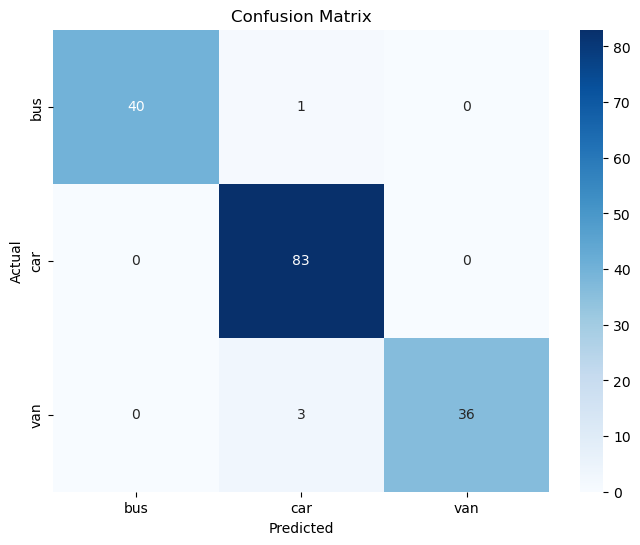

Classification Report:
               precision    recall  f1-score   support

         bus       1.00      0.98      0.99        41
         car       0.95      1.00      0.98        83
         van       1.00      0.92      0.96        39

    accuracy                           0.98       163
   macro avg       0.98      0.97      0.97       163
weighted avg       0.98      0.98      0.98       163



In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Cleaned_vehicle.csv")

# Encode the categorical class column
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])  # Convert class names to numerical labels

# Split into features and labels
X = df.drop(columns=["class"]).values  # Features
y = df["class"].values  # Labels

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape input for CNN (Converting 18 features into (18,1) shape)
X_train = X_train.reshape(X_train.shape[0], 18, 1)  
X_test = X_test.reshape(X_test.shape[0], 18, 1)

# Define CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation="relu", input_shape=(18, 1)),  
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation="softmax")  # Output layer for classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Convert predictions back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


# LINEAR REGRESSION

Train Accuracy: 0.7815
Test Accuracy: 0.7301


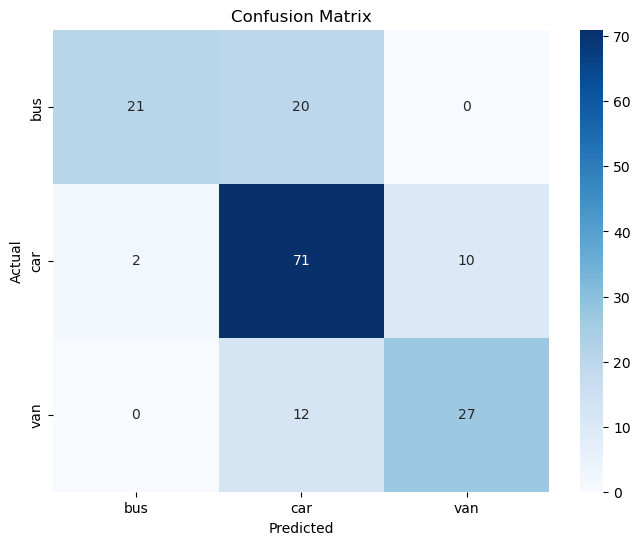

Classification Report:
               precision    recall  f1-score   support

         bus       0.91      0.51      0.66        41
         car       0.69      0.86      0.76        83
         van       0.73      0.69      0.71        39

    accuracy                           0.73       163
   macro avg       0.78      0.69      0.71       163
weighted avg       0.76      0.73      0.72       163



In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load the dataset
df = pd.read_csv("Cleaned_vehicle.csv")

# Encode the categorical target column
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])  # Convert class names to numbers

# Split features and target
X = df.drop(columns=["class"]).values  # Features
y = df["class"].values  # Labels

# Standardize features for better performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = np.round(model.predict(X_train)).astype(int)  # Round predictions to nearest class
y_test_pred = np.round(model.predict(X_test)).astype(int)

# Ensure predictions are within valid class range
y_train_pred = np.clip(y_train_pred, 0, len(np.unique(y)) - 1)
y_test_pred = np.clip(y_test_pred, 0, len(np.unique(y)) - 1)

# Convert predictions back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_test_pred)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


# LOGISTIC  REGRESSION

Train Accuracy: 0.9600
Test Accuracy: 0.9448


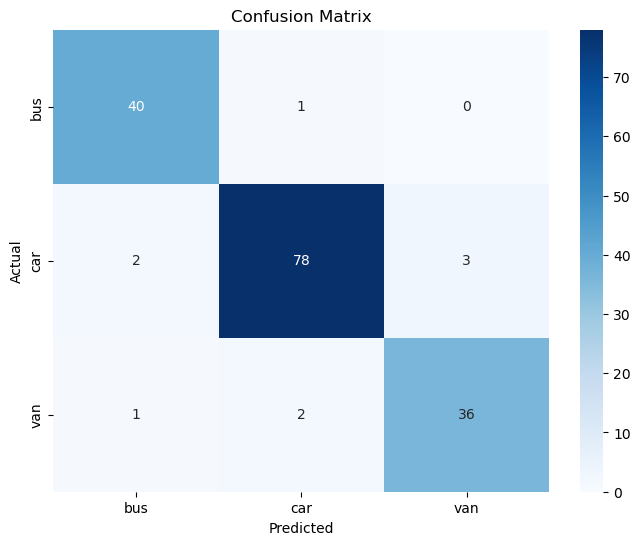

Classification Report:
               precision    recall  f1-score   support

         bus       0.93      0.98      0.95        41
         car       0.96      0.94      0.95        83
         van       0.92      0.92      0.92        39

    accuracy                           0.94       163
   macro avg       0.94      0.95      0.94       163
weighted avg       0.95      0.94      0.94       163



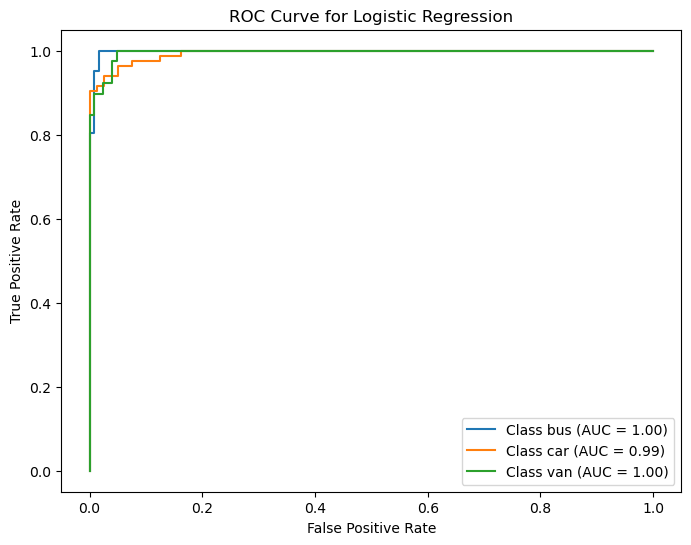

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load the dataset
file_path = "Cleaned_vehicle.csv"
df = pd.read_csv(file_path)

# Encode the categorical class column
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])  # Convert class names to numbers

# Split features and target
X = df.drop(columns=["class"]).values  # Features
y = df["class"].values  # Labels

# Standardize features for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial")
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_test_pred)
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# ROC Curve (One-vs-Rest for multi-class)
y_prob = model.predict_proba(X_test)
plt.figure(figsize=(8,6))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


# PCA

Train Accuracy: 0.8385
Test Accuracy: 0.8160


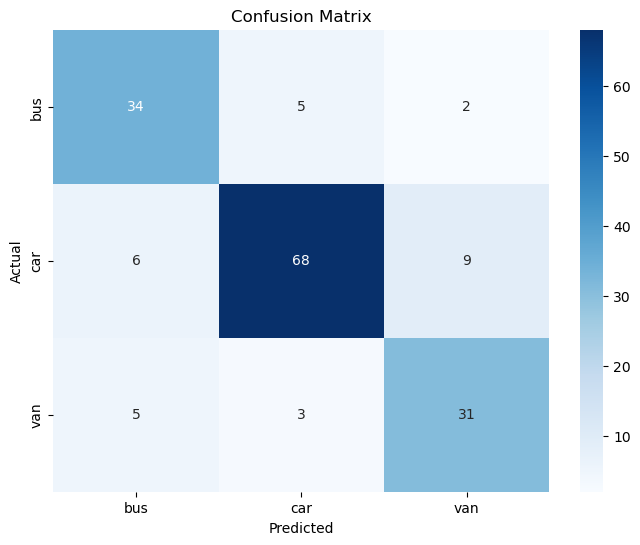

Classification Report:
               precision    recall  f1-score   support

         bus       0.76      0.83      0.79        41
         car       0.89      0.82      0.86        83
         van       0.74      0.79      0.77        39

    accuracy                           0.82       163
   macro avg       0.80      0.81      0.80       163
weighted avg       0.82      0.82      0.82       163



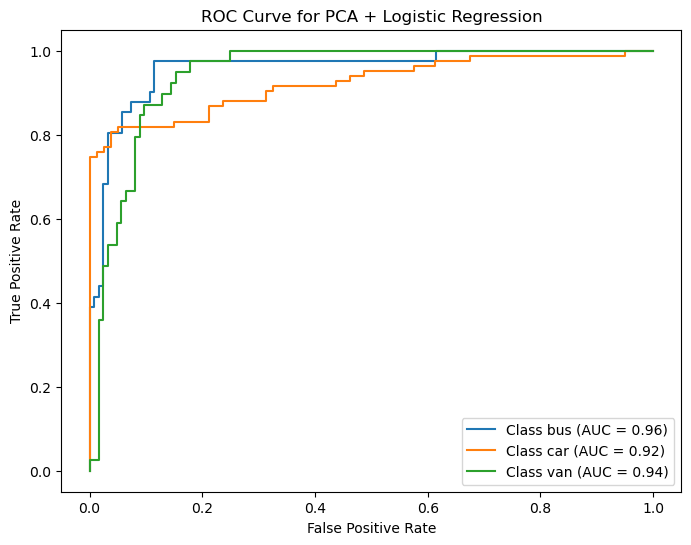

Number of PCA Components Used: 7
PCA Components:
 [[ 0.2706444   0.2879274   0.30189542  0.26488612  0.10819569  0.19607519
   0.3094886  -0.30802536  0.30609666  0.27705421  0.30094235  0.30992966
   0.26205222 -0.04898919  0.02984848  0.05729419  0.03803527  0.08922378]
 [-0.09000138  0.14313795 -0.04594257 -0.18138005 -0.2354609  -0.08389564
   0.07305538 -0.01100866  0.0866048   0.12766552  0.06525773  0.05981228
   0.21449985  0.50511689 -0.0219469  -0.07782626 -0.51504733 -0.51367566]
 [-0.05992487  0.1746775  -0.11490613  0.11625458  0.41329222 -0.0029998
  -0.10194194  0.05326243 -0.11484152  0.1452417  -0.06452452 -0.09134994
   0.21196828  0.01837548  0.19932923 -0.78770979  0.05182402 -0.01284508]
 [-0.16581983 -0.09048258 -0.04245959  0.26515999  0.47348523 -0.20211148
   0.03456793 -0.08897826  0.00960702 -0.14465207  0.13499937  0.04658063
  -0.06528387  0.15198291 -0.73400122  0.0314825  -0.03488227 -0.0911979 ]
 [ 0.10408916 -0.12130472 -0.08763393  0.15438667  0.216730

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load the dataset
file_path = "Cleaned_vehicle.csv"
df = pd.read_csv(file_path)

# Encode the categorical class column
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])  # Convert class names to numerical labels

# Split features and target
X = df.drop(columns=["class"]).values  # Features
y = df["class"].values  # Labels

# Standardize features for better PCA performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA (Reduce dimensions to 95% variance)
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial")
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_test_pred)
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# ROC Curve (One-vs-Rest for multi-class)
y_prob = model.predict_proba(X_test)
plt.figure(figsize=(8,6))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for PCA + Logistic Regression")
plt.legend()
plt.show()

# Print number of PCA components used
print(f"Number of PCA Components Used: {pca.n_components_}")
print("PCA Components:\n", pca.components_)


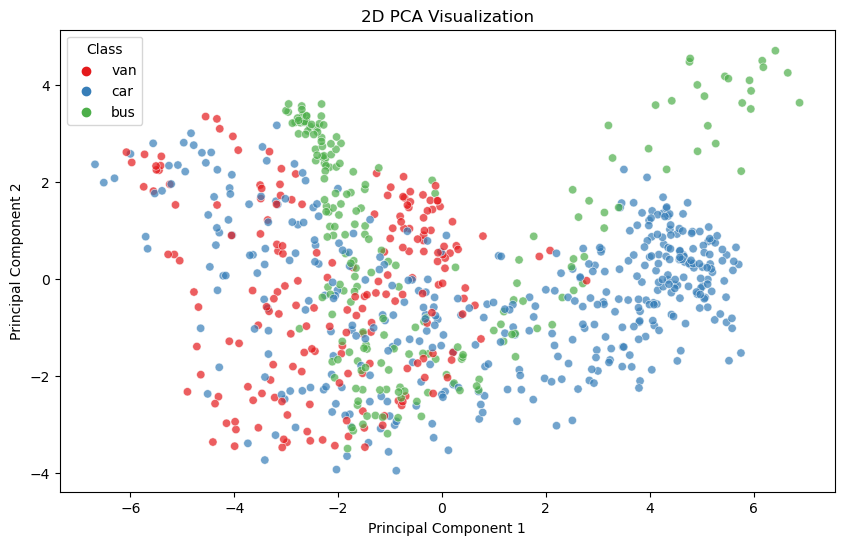

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Convert to DataFrame for plotting
df_pca = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca["class"] = label_encoder.inverse_transform(y)  # Convert labels back

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="class", data=df_pca, palette="Set1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.legend(title="Class")
plt.show()


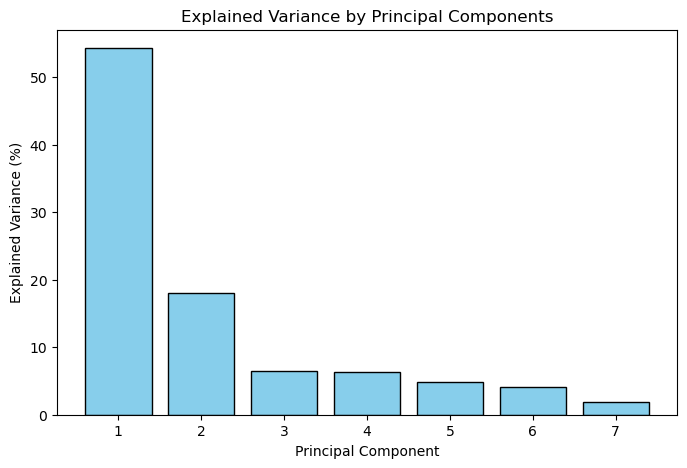

In [3]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_ * 100, color='skyblue', edgecolor='black')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance by Principal Components")
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


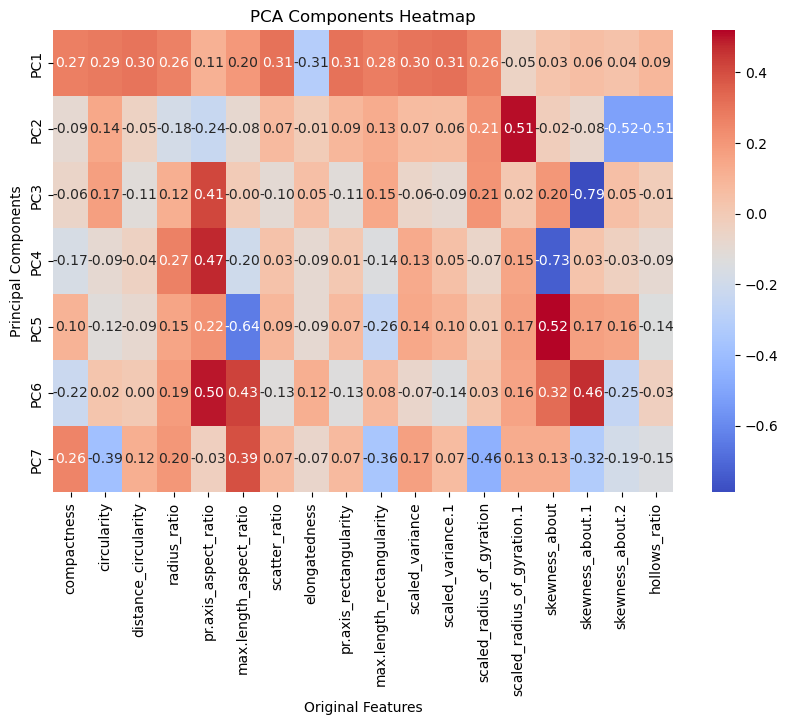

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(pca.components_, cmap="coolwarm", annot=True, fmt=".2f", xticklabels=df.drop(columns=["class"]).columns, yticklabels=[f"PC{i+1}" for i in range(pca.n_components_)])
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.title("PCA Components Heatmap")
plt.show()


In [11]:
pip install --upgrade threadpoolctl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# KNN

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNN Train Accuracy: 1.0
KNN Test Accuracy: 0.9447852760736196
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.99      0.93      0.96        83
           2       0.86      0.92      0.89        39

    accuracy                           0.94       163
   macro avg       0.93      0.95      0.94       163
weighted avg       0.95      0.94      0.95       163



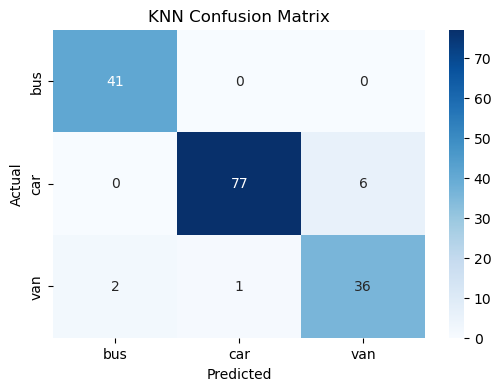

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Cleaned_vehicle.csv")

# Encode the categorical class column
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])

# Split into features and labels
X = df.drop(columns=["class"]).values  # Features
y = df["class"].values  # Labels

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------- KNN Model with GridSearchCV ---------
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy', n_jobs=1)
grid_knn.fit(X_train, y_train)

# Best KNN model
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Best KNN Parameters:", grid_knn.best_params_)
print("KNN Train Accuracy:", accuracy_score(y_train, best_knn.predict(X_train)))
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


# GAUSSIAN NAIVE BAYES

Best GNB Parameters: {'var_smoothing': 1e-12}
GNB Train Accuracy: 0.6323076923076923
GNB Test Accuracy: 0.6257668711656442
GNB Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.20      0.31        41
           1       0.85      0.69      0.76        83
           2       0.43      0.95      0.59        39

    accuracy                           0.63       163
   macro avg       0.69      0.61      0.56       163
weighted avg       0.74      0.63      0.61       163



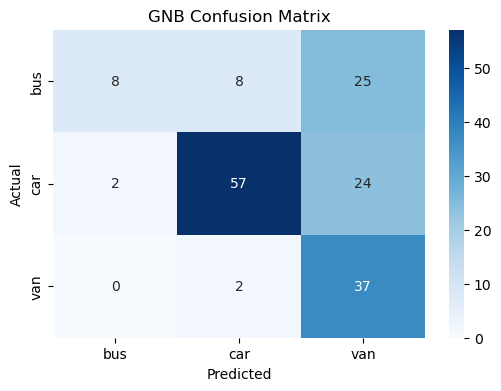

In [6]:
# --------- Gaussian Naive Bayes with GridSearchCV ---------
gnb_params = {'var_smoothing': np.logspace(-12, -5, 20)}

gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, gnb_params, cv=10, scoring='accuracy', n_jobs=1)
grid_gnb.fit(X_train, y_train)

# Best GNB model
best_gnb = grid_gnb.best_estimator_
y_pred_gnb = best_gnb.predict(X_test)

print("Best GNB Parameters:", grid_gnb.best_params_)
print("GNB Train Accuracy:", accuracy_score(y_train, best_gnb.predict(X_train)))
print("GNB Test Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GNB Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Confusion Matrix for GNB
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GNB Confusion Matrix")
plt.show()

# LDA

Best LDA Parameters: {'n_components': 1}
LDA Train Accuracy: 0.9538461538461539
LDA Test Accuracy: 0.950920245398773
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.96      0.94      0.95        83
           2       0.90      0.95      0.92        39

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163



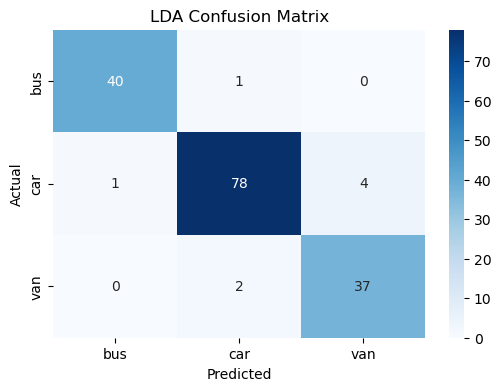

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Cleaned_vehicle.csv")

# Encode the categorical class column
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])

# Split into features and labels
X = df.drop(columns=["class"]).values  # Features
y = df["class"].values  # Labels

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------- LDA Model with GridSearchCV ---------
lda_params = {'n_components': [1, 2, 3, 4, 5]}

lda = LinearDiscriminantAnalysis()
grid_lda = GridSearchCV(lda, lda_params, cv=10, scoring='accuracy', n_jobs=-1)
grid_lda.fit(X_train, y_train)

# Best LDA model
best_lda = grid_lda.best_estimator_
y_pred_lda = best_lda.predict(X_test)

print("Best LDA Parameters:", grid_lda.best_params_)
print("LDA Train Accuracy:", accuracy_score(y_train, best_lda.predict(X_train)))
print("LDA Test Accuracy:", accuracy_score(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

# Confusion Matrix for LDA
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LDA Confusion Matrix")
plt.show()
